In [2]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 3b - Approximating f = sin(x) with a neural network
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[1,]),
    keras.layers.Dense(100, activation=None),
    keras.layers.Dense(200, activation="sigmoid"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.Dense(200, activation="sigmoid"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(1, activation=None),  
])

x = np.arange(-5,5,0.0001)
y_list = [np.sin(x[i]) for i in range(len(x))]
y = np.array(y_list)

# 80% train, 20% test data
x_train = x[:80000]
y_train = y[:80000]
x_test = x[80000:]
y_test = y[80000:]

In [4]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=10, batch_size=100) 
model.summary()

Epoch 1/10
800/800 [==============================] - 6s 6ms/step - loss: 0.0831
Epoch 2/10
800/800 [==============================] - 5s 6ms/step - loss: 0.0016
Epoch 3/10
800/800 [==============================] - 5s 6ms/step - loss: 9.3375e-04
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 6.8181e-04
Epoch 5/10
800/800 [==============================] - 5s 6ms/step - loss: 5.4498e-04
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 4.2393e-04
Epoch 7/10
800/800 [==============================] - 5s 6ms/step - loss: 3.8231e-04
Epoch 8/10
800/800 [==============================] - 5s 6ms/step - loss: 3.0714e-04
Epoch 9/10
800/800 [==============================] - 5s 6ms/step - loss: 2.9015e-04
Epoch 10/10
800/800 [==============================] - 5s 6ms/step - loss: 2.2839e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flat

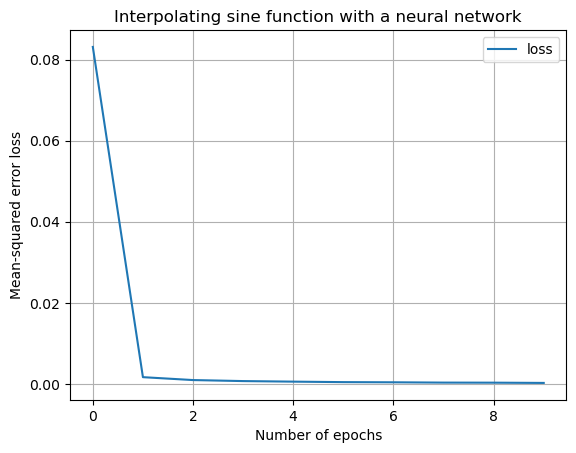

In [5]:
# plot the loss
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.xlabel("Number of epochs")
plt.ylabel("Mean-squared error loss")
plt.title("Interpolating sine function with a neural network")
plt.show()

800/800 [==============================] - 3s 4ms/step


Text(0.5, 1.0, 'Train data')

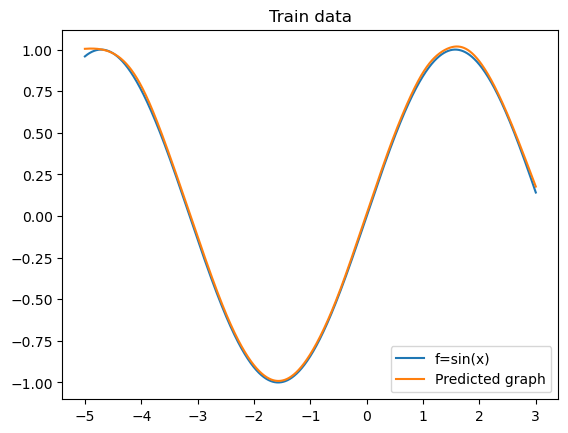

In [6]:
# plot the predictions from the neural network vs. the original function
y_pred = model.predict(x_train, batch_size=100)  # training data

plt.plot(x_train, y_train, label="f=sin(x)")
plt.plot(x_train, y_pred, label="Predicted graph")
plt.legend(loc="lower right")
plt.title("Train data")

2000/2000 [==============================] - 5s 2ms/step


Text(0.5, 1.0, 'Test data')

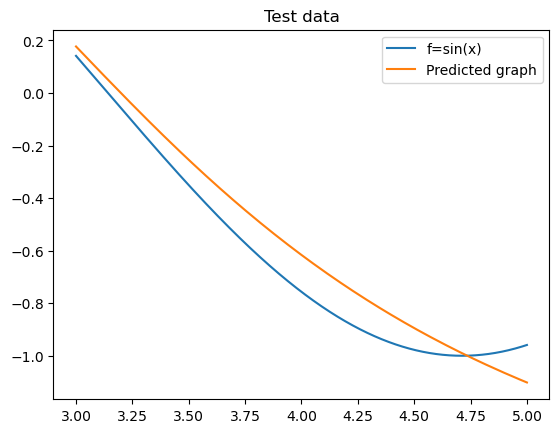

In [7]:
# Test data
y_pred_test = model.predict(x_test, batch_size=10) 

plt.plot(x_test, y_test, label="f=sin(x)")
plt.plot(x_test,y_pred_test, label="Predicted graph")
plt.legend(loc="upper right")
plt.title("Test data")